Author: Juan Sebastian Murcia Ramirez - 
E-mail: js.murcia@uniandes.edu.co

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

### Read the data

In [4]:
main_path = r"C:\Users\SEBASTIAN\OneDrive - Universidad de los Andes\OctavoSemestre\ProblemaEspecial\ML/dataSets/"
pd_data_v1 = pd.read_csv(main_path+'dataSet_dron_v1.csv')
pd_data_v4 = pd.read_csv(main_path + 'dataSet_dron_v8_total_salo.csv')

main_path = r"C:\Users\SEBASTIAN\OneDrive - Universidad de los Andes\OctavoSemestre\ProblemaEspecial\ML/paquetes/v8 y v9/"
path_energy = main_path + "featuresEnergy_v8.csv"
path_energy_v2 = main_path + "featuresEnergy_v9.csv"
path_turns = main_path + "distanceTurn_v8.csv"
path_turns_v2 = main_path + "distanceTurn_v9.csv"

data_energy = pd.read_csv(path_energy)
data_energy_v2 = pd.read_csv(path_energy_v2)

pd_data_v4 = pd.concat([data_energy,data_energy_v2])
pd_data = pd_data_v4

### Data preview

In [5]:
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1175 entries, 0 to 849
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   path_num        1175 non-null   int64  
 1   missing_points  1175 non-null   int64  
 2   teo_point_time  1175 non-null   int64  
 3   sim_drone_time  1175 non-null   float64
 4   teo_point_dist  1175 non-null   float64
 5   teo_Xdist       1175 non-null   int64  
 6   teo_Ydist       1175 non-null   int64  
 7   teo_point_vel   1175 non-null   float64
 8   Energy          1175 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 91.8 KB


In [6]:
pd_data.head()

,path_num,missing_points,teo_point_time,sim_drone_time,teo_point_dist,teo_Xdist,teo_Ydist,teo_point_vel,Energy
0,1,6,140,137.600006,4.472136,2,4,0.031944,2.797667e+08
1,1,5,63,62.149994,6.403124,-4,-5,0.101637,1.324583e+08
2,1,4,78,74.050003,5.385165,-2,5,0.069041,2.716606e+07
3,1,3,95,93.599976,9.219544,6,-7,0.097048,1.662099e+08
4,1,2,102,100.649963,3.605551,-2,3,0.035349,8.003795e+07


### Data split and preprocessing

In [8]:
X = pd_data.drop(columns=["missing_points","path_num","sim_drone_time","Energy"],axis=1)
y = pd_data["Energy"]

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=35)

X_train_mean = x_train.mean(axis=0)
X_train_std = x_train.std(axis=0)

In [9]:
X_train_mean_array = X_train_mean.to_numpy()
X_train_std_array = X_train_std.to_numpy()
x_train_array = x_train.to_numpy()
x_test_array = x_test.to_numpy()

In [10]:
print(x_train_array.shape)
print(x_test_array.shape)
print(X_train_mean_array.shape)
print(X_train_std_array.shape)


(940, 5)
(235, 5)
(5,)
(5,)


In [11]:
x_train_array = (x_train_array-X_train_mean_array)/X_train_std_array
x_test_array = (x_test_array-X_train_mean_array)/X_train_std_array

In [12]:
print(x_train_array.mean(axis=0))
print(x_train_array.std(axis=0))
print(x_test_array.mean(axis=0))
print(x_test_array.std(axis=0))

[ 7.27550408e-17  9.70476654e-15  1.13384479e-17  1.51179305e-17
 -1.78391580e-15]
[0.99946794 0.99946794 0.99946794 0.99946794 0.99946794]
[ 0.0344143  -0.01145857  0.10049577 -0.07810532 -0.03472751]
[1.06448399 1.06841773 1.0251686  0.98271529 1.03869804]


In [14]:
print(f'Train size/Test size {len(x_train),len(x_test)}')

Train size/Test size (940, 235)


In [15]:
columns = x_train.columns
x_train_v1 = pd.DataFrame(data=x_train_array,columns=columns)
x_test_v1 = pd.DataFrame(data=x_test_array,columns=columns)
x_train_v1.head()


,teo_point_time,teo_point_dist,teo_Xdist,teo_Ydist,teo_point_vel
0,-0.553135,-0.448270,-0.691516,0.71603,-0.106561
1,-0.179153,0.316042,1.415533,-0.36898,0.402591
2,-0.665330,-0.797969,0.362009,0.71603,-0.470955
3,-0.216551,-0.251182,-1.042690,-0.36898,-0.206122
4,-1.039312,-0.251182,-0.340341,-1.09232,0.976286


### Analisis de los datos

array([[<AxesSubplot:title={'center':'teo_point_time'}>,
        <AxesSubplot:title={'center':'teo_point_dist'}>],
       [<AxesSubplot:title={'center':'teo_Xdist'}>,
        <AxesSubplot:title={'center':'teo_Ydist'}>],
       [<AxesSubplot:title={'center':'teo_point_vel'}>, <AxesSubplot:>]],
      dtype=object)

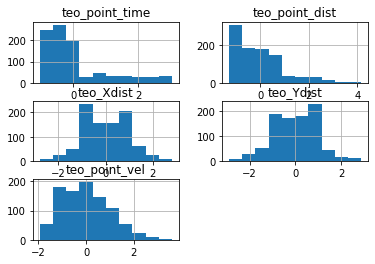

In [16]:
x_train_v1.hist()

In [17]:
print(y_train.max())
print(y_train.min())

425034955.55257934
1296522.8837545956


### Fit - LinearRegression

In [18]:
linearRe = LinearRegression()
model = linearRe.fit(x_train_v1,y_train)

### Accuracy

In [26]:
predict = linearRe.predict(x_test_v1)

r2 = r2_score(y_test,predict)
rmse = mean_squared_error(y_test,predict,squared=False)


print(f'r2 score: {r2}')
print(f'RMSE score: {rmse}')

r2 score: 0.21991084676279082
RMSE score: 3837603601.0339427


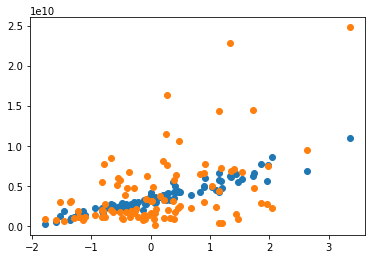

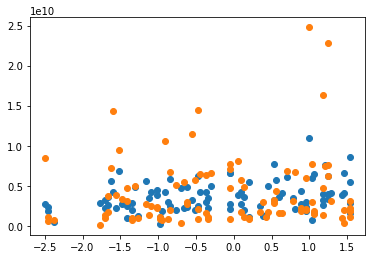

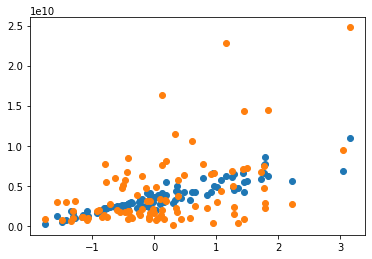

In [27]:
for i in range(3):
    plt.scatter(x_test_array[:,i],predict)
    plt.scatter(x_test_array[:,i],y_test)
    plt.show()

In [17]:
predict = linearRe.predict(x_test_v1)

r2 = r2_score(y_test,predict)
rmse = mean_squared_error(y_test,predict,squared=False)


print(f'r2 score: {r2}')
print(f'RMSE score: {rmse}')

r2 score: -0.00596437868594446
RMSE score: 57188908.101708025


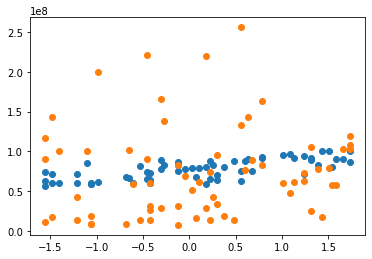

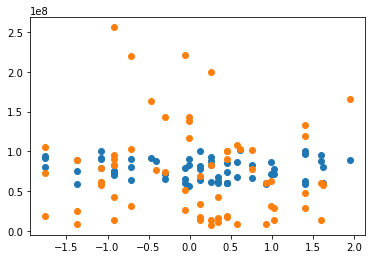

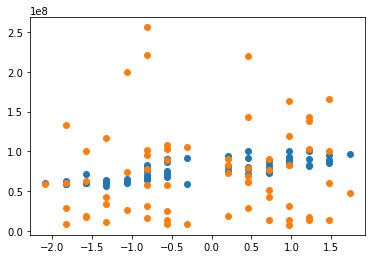

In [18]:
for i in range(3):
    plt.scatter(x_test_array[:,i],predict)
    plt.scatter(x_test_array[:,i],y_test)
    plt.show()

Prueba con datos v8 y v9, completa

In [19]:
predict = linearRe.predict(x_test_v1)

r2 = r2_score(y_test,predict)
rmse = mean_squared_error(y_test,predict,squared=False)


print(f'r2 score: {r2}')
print(f'RMSE score: {rmse}')

r2 score: 0.24705459355734216
RMSE score: 41970439.05314368


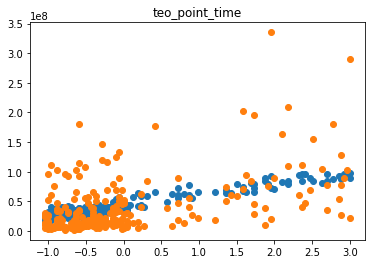

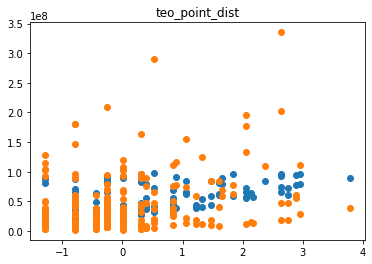

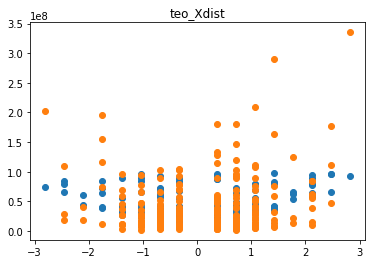

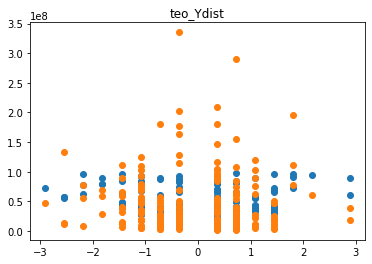

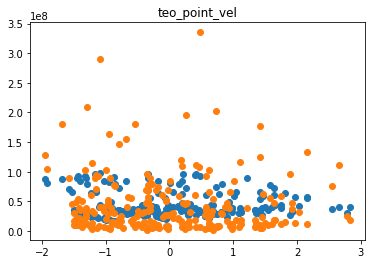

In [20]:
titles = ["teo_point_time",	"teo_point_dist", "teo_Xdist","teo_Ydist","teo_point_vel"]
for i in range(5):
    plt.scatter(x_test_array[:,i],predict)
    plt.scatter(x_test_array[:,i],y_test)
    plt.title(titles[i])
    plt.show()

### 1) Thresholds analysis

thre_1 = 1E10 , thre_2 = 4E9

In [50]:
y_train_prueba = y_train
y_train_prueba = y_train_prueba.reset_index(drop=True)

y_test_prueba = y_test
y_test_prueba = y_test_prueba.reset_index(drop=True)

In [51]:
x_train_thre_1 = x_train_v1[y_train_prueba <= 1.0E10]
x_train_thre_2 = x_train_v1[y_train_prueba <= 4.0E9]

x_test_thre_1 = x_test_v1[y_test_prueba <= 1.0E10]
x_test_thre_2 = x_test_v1[y_test_prueba <= 4.0E9]

In [52]:
y_train_thre_1 = y_train[y_train <= 1.0E10]
y_train_thre_2 = y_train[y_train <= 4.0E9]

y_test_thre_1 = y_test[y_test <= 1.0E10]
y_test_thre_2 = y_test[y_test <= 4.0E9]

In [53]:
linearRe_thre_1 = LinearRegression()
linearRe_thre_2 = LinearRegression()

model_thre_1 = linearRe_thre_1.fit(x_train_thre_1,y_train_thre_1)
model_thre_2 = linearRe_thre_2.fit(x_train_thre_2,y_train_thre_2)

In [55]:
predict_thre_1 = linearRe_thre_1.predict(x_test_thre_1)
predict_thre_2 = linearRe_thre_2.predict(x_test_thre_2)

r2_thre1 = r2_score(y_test_thre_1,predict_thre_1)
rmse_thre1 = mean_squared_error(y_test_thre_1,predict_thre_1,squared=False)

r2_thre2 = r2_score(y_test_thre_2,predict_thre_2)
rmse_thre2 = mean_squared_error(y_test_thre_2,predict_thre_2,squared=False)

print(f'r2 score thre1: {r2_thre1}')
print(f'RMSE score thre1: {rmse_thre1}')

print(f'r2 score thre2: {r2_thre2}')
print(f'RMSE score thre2: {rmse_thre2}')

r2 score thre1: 0.1375828088013037
RMSE score thre1: 2204947716.3858743
r2 score thre2: 0.07368024640926785
RMSE score thre2: 878286859.159675


### 2) Thresholds analysis

thre_1 = 1.5E8

In [21]:
y_train_prueba = y_train
y_train_prueba = y_train_prueba.reset_index(drop=True)

y_test_prueba = y_test
y_test_prueba = y_test_prueba.reset_index(drop=True)

In [22]:
x_train_thre_1 = x_train_v1[y_train_prueba <= 1.5E8]
x_test_thre_1 = x_test_v1[y_test_prueba <= 1.5E8]

y_train_thre_1 = y_train[y_train <= 1.5E8]
y_test_thre_1 = y_test[y_test <= 1.5E8]


In [23]:
linearRe_thre_1 = LinearRegression()
model_thre_1 = linearRe_thre_1.fit(x_train_thre_1,y_train_thre_1)

In [24]:
predict_thre_1 = linearRe_thre_1.predict(x_test_thre_1)


r2_thre1 = r2_score(y_test_thre_1,predict_thre_1)
rmse_thre1 = mean_squared_error(y_test_thre_1,predict_thre_1,squared=False)


print(f'r2 score thre1: {r2_thre1}')
print(f'RMSE score thre1: {rmse_thre1}')

r2 score thre1: 0.13422466751202122
RMSE score thre1: 29781844.668545328


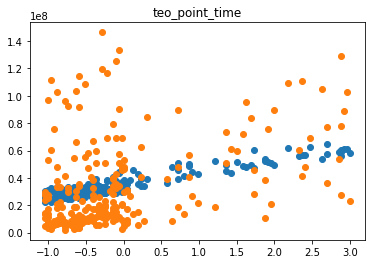

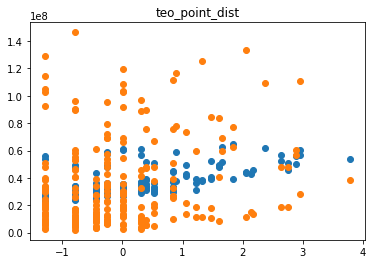

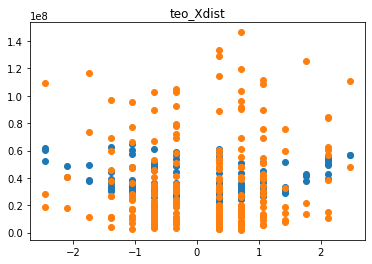

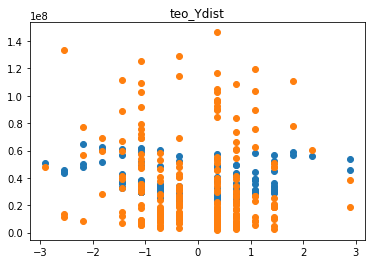

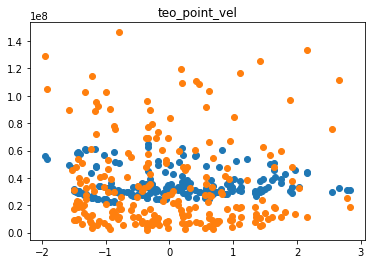

In [26]:
x_test_array = x_test_thre_1.to_numpy()
titles = ["teo_point_time",	"teo_point_dist", "teo_Xdist","teo_Ydist","teo_point_vel"]
for i in range(5):
    plt.scatter(x_test_array[:,i],predict_thre_1)
    plt.scatter(x_test_array[:,i],y_test_thre_1)
    plt.title(titles[i])
    plt.show()